In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt

[list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp)

In [32]:
# read the data
input_dir = "/Users/arama1/Desktop/Accelerator/Data/Output/Reddit"

all_files = pd.concat([
    pd.read_csv(os.path.join(input_dir, file))
    for file in os.listdir(input_dir)
    if file.endswith('.csv')
])

# equivalent
# csv_files = []
# for file in os.listdir(input_dir):
#     if file.endswith('.csv'):
#         file_path = os.path.join(input_dir, file)
#         df = pd.read_csv(file_path)
#         csv_files.append(df)
# all_files = pd.concat(csv_files)

# save the data
all_files.to_csv('/Users/arama1/Desktop/Accelerator/Data/Output/Reddit/all_files.csv', index=False)


In [33]:
all_files.head()

id_submission name created_utc_submission  \
0         a321r  NaN    2009-11-11 00:44:34   
1         beu6w  NaN    2010-03-18 04:39:55   
2         chhhi  NaN    2010-06-21 21:33:37   
3         cjo99  NaN    2010-06-28 01:25:43   
4         cknwk  NaN    2010-06-30 19:47:49   

                                               title  \
0  Essure - did you know about this form of perma...   
1  Anyone have experience with Essure? I'm consid...   
2  Is there an age minimum for Essure/tubal litig...   
3  Any experiences with transcervical sterilizati...   
4                         A good gynecologist story!   

                                            selftext subreddit_submission  \
0                                          [deleted]      TwoXChromosomes   
1                                                NaN      TwoXChromosomes   
2  Some background: I'm 17, live with my somewhat...      TwoXChromosomes   
3  I'm firmly decided to never have children and ...      TwoXChromosomes   
4  Ok, so, I turn 25 next month. Me and my husban...      TwoXChromosomes   

  author_submission id_comment subreddit_comment created_utc_comment body  \
0         [deleted]        NaN               NaN                 NaN  NaN   
1            _Kita_        NaN               NaN                 NaN  NaN   
2         drugsrbad        NaN               NaN                 NaN  NaN   
3          Deviant1        NaN               NaN                 NaN  NaN   
4        Bantam_Fox        NaN               NaN                 NaN  NaN   

  link_id parent_id author_comment  
0     NaN       NaN            NaN  
1     NaN       NaN            NaN  
2     NaN       NaN            NaN  
3     NaN       NaN            NaN  
4     NaN       NaN            NaN

In [34]:
# how many unique submission are there?
all_files.groupby(['subreddit_submission'])['id_submission'].nunique()


subreddit_submission
AskDocs              38
AskWomenOver30       20
Parenting            20
Supplements           1
TwoXChromosomes     419
birthcontrol        280
childfree          2587
healthcare            6
hysterectomy         33
medicine              7
truechildfree        54
Name: id_submission, dtype: int64

In [35]:
#number of unique comments (grouped by subreddit)?
all_files.groupby(['subreddit_comment'])['id_comment'].nunique()

subreddit_comment
AskDocs              109
AskWomenOver30       116
Parenting             91
Supplements            2
TwoXChromosomes     1649
birthcontrol         967
childfree          17147
healthcare            27
hysterectomy         112
medicine              33
truechildfree        303
Name: id_comment, dtype: int64

Is unique user ever a question? Does Reddit allow multiple entries for the same user?

In [36]:
print(all_files.iloc[3127]['created_utc_submission'])

2013-09-04 01:50:02


In [37]:
all_files.iloc[1182, all_files.columns.get_loc('created_utc_submission')] = '2009-05-13 00:58:50'
print(all_files.iloc[1182, all_files.columns.get_loc('created_utc_submission')])

2009-05-13 00:58:50


In [38]:
# Define the replacement function
def replace_value(x):
    if x == 't3_1sele2':
        return '2009-05-13 00:58:50'
    else:
        return x
    
all_files['created_utc_submission'] = all_files['created_utc_submission'].apply(replace_value)



In [39]:
# Convert the timestamp column to datetime
all_files['created_utc_comment'] = pd.to_datetime(all_files['created_utc_comment'])
all_files['created_utc_submission'] = pd.to_datetime(all_files['created_utc_submission']) 


In [40]:
all_files['created_utc_submission'].head()

0   2009-11-11 00:44:34
1   2010-03-18 04:39:55
2   2010-06-21 21:33:37
3   2010-06-28 01:25:43
4   2010-06-30 19:47:49
Name: created_utc_submission, dtype: datetime64[ns]

In [41]:
print("Earliest comment:", all_files['created_utc_comment'].min())

print("Latest comment:", all_files['created_utc_comment'].max())

Earliest comment: 2009-07-20 11:45:20
Latest comment: 2022-12-31 04:27:00


In [42]:
# Group by subreddit and show date ranges
for subreddit in all_files['subreddit_submission'].unique():
    subreddit_data = all_files[all_files['subreddit_submission'] == subreddit]
    print(f"\nSubreddit: {subreddit}")
    print("Earliest submission:", subreddit_data['created_utc_submission'].min())
    print("Latest submission:", subreddit_data['created_utc_submission'].max())


Subreddit: TwoXChromosomes
Earliest submission: 2009-11-11 00:44:34
Latest submission: 2022-12-30 17:11:37

Subreddit: nan
Earliest submission: NaT
Latest submission: NaT

Subreddit: truechildfree
Earliest submission: 2014-03-14 14:54:48
Latest submission: 2022-09-25 19:26:32

Subreddit: hysterectomy
Earliest submission: 2019-01-17 14:21:32
Latest submission: 2022-11-22 14:21:01

Subreddit: childfree
Earliest submission: 2010-08-04 17:15:16
Latest submission: 2022-12-29 22:15:41

Subreddit: healthcare
Earliest submission: 2016-01-25 10:12:26
Latest submission: 2021-03-25 18:40:35

Subreddit: Supplements
Earliest submission: 2021-12-26 18:11:36
Latest submission: 2021-12-26 18:11:36

Subreddit: AskWomenOver30
Earliest submission: 2014-01-03 20:32:38
Latest submission: 2022-09-02 16:31:12

Subreddit: medicine
Earliest submission: 2014-11-21 18:22:14
Latest submission: 2022-10-28 16:05:02

Subreddit: birthcontrol
Earliest submission: 2011-07-28 23:16:46
Latest submission: 2022-12-25 22:3

plot this?

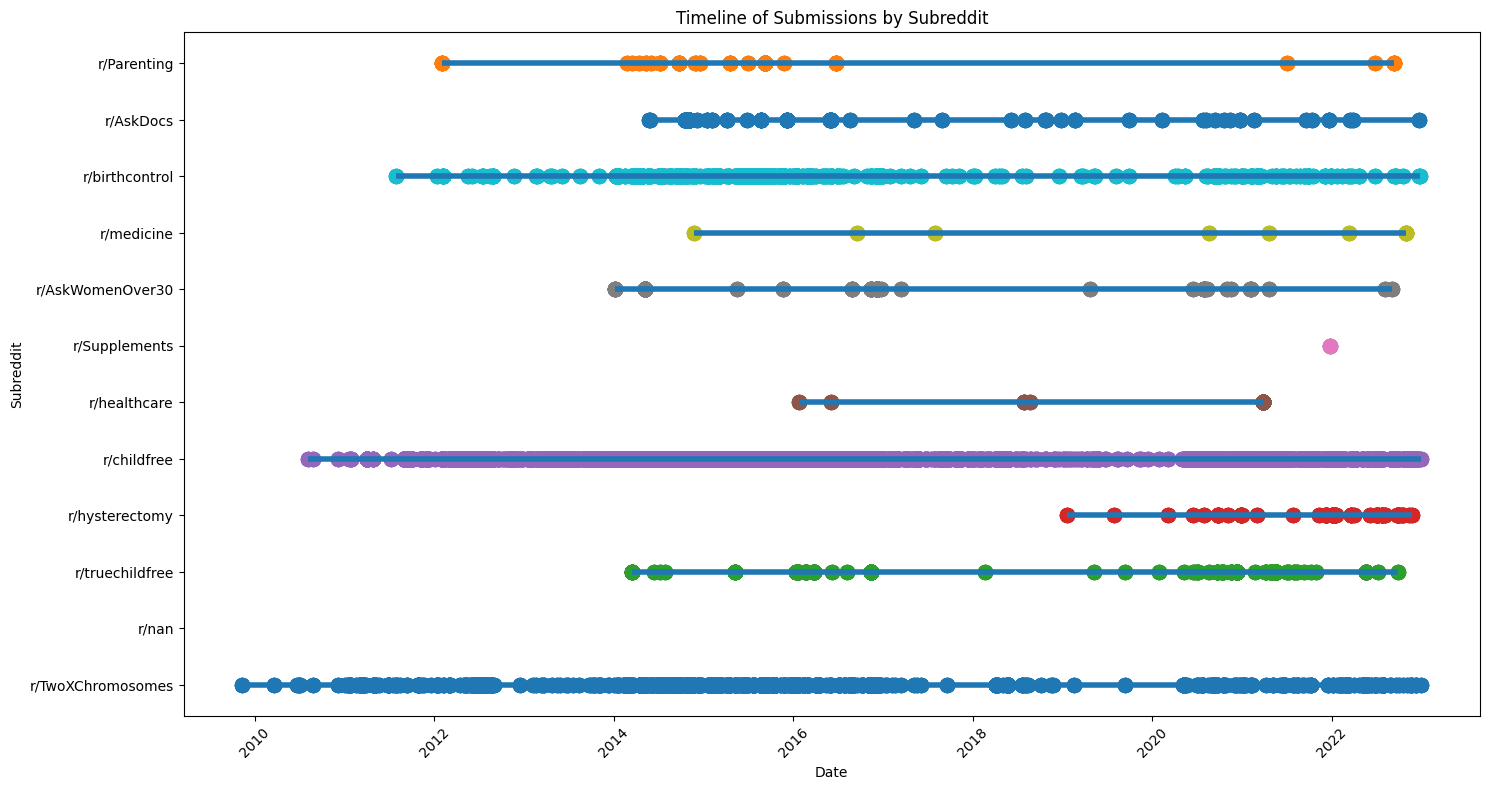

In [43]:
# Create figure with larger size
plt.figure(figsize=(15, 8))
# Get unique subreddits
subreddits = all_files['subreddit_submission'].unique()
# Create timeline for each subreddit
for i, subreddit in enumerate(subreddits):
    subreddit_data = all_files[all_files["subreddit_submission"] == subreddit]
    # Get min and max dates
    min_date = subreddit_data['created_utc_submission'].min()
    max_date = subreddit_data['created_utc_submission'].max()
    
    # Plot horizontal line for the date range
    plt.hlines(y=i, xmin=min_date, xmax=max_date, linewidth=4)
    # Add points for individual submissions
    plt.scatter(subreddit_data['created_utc_submission'], [i] * len(subreddit_data), s=100,
               alpha=1, label=f"Posts in r/{subreddit}")
# Customize the plot
plt.yticks(range(len(subreddits)), [f"r/{s}" for s in subreddits])
plt.xlabel('Date')
plt.ylabel('Subreddit')
plt.title('Timeline of Submissions by Subreddit')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Adjust layout to prevent label cutoff
plt.tight_layout()
# Show the plot
plt.show()

In [44]:
#Separate data r/childfree and r/birthcontrol and r/TwoXChromosomes into a subset
subsetCFBC_data = all_files[(all_files['subreddit_submission'] == 'childfree') | (all_files['subreddit_submission'] == 'birthcontrol')|(all_files['subreddit_submission'] == 'TwoXChromosomes')]

subsetCFBC_data.head(5)

id_submission name created_utc_submission  \
0         a321r  NaN    2009-11-11 00:44:34   
1         beu6w  NaN    2010-03-18 04:39:55   
2         chhhi  NaN    2010-06-21 21:33:37   
3         cjo99  NaN    2010-06-28 01:25:43   
4         cknwk  NaN    2010-06-30 19:47:49   

                                               title  \
0  Essure - did you know about this form of perma...   
1  Anyone have experience with Essure? I'm consid...   
2  Is there an age minimum for Essure/tubal litig...   
3  Any experiences with transcervical sterilizati...   
4                         A good gynecologist story!   

                                            selftext subreddit_submission  \
0                                          [deleted]      TwoXChromosomes   
1                                                NaN      TwoXChromosomes   
2  Some background: I'm 17, live with my somewhat...      TwoXChromosomes   
3  I'm firmly decided to never have children and ...      TwoXChromosomes   
4  Ok, so, I turn 25 next month. Me and my husban...      TwoXChromosomes   

  author_submission id_comment subreddit_comment created_utc_comment body  \
0         [deleted]        NaN               NaN                 NaT  NaN   
1            _Kita_        NaN               NaN                 NaT  NaN   
2         drugsrbad        NaN               NaN                 NaT  NaN   
3          Deviant1        NaN               NaN                 NaT  NaN   
4        Bantam_Fox        NaN               NaN                 NaT  NaN   

  link_id parent_id author_comment  
0     NaN       NaN            NaN  
1     NaN       NaN            NaN  
2     NaN       NaN            NaN  
3     NaN       NaN            NaN  
4     NaN       NaN            NaN

/var/folders/lz/3dhhqmvn2ksf1gl3c61trx4r0000gn/T/ipykernel_68732/720589892.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsetCFBC_data['created_utc_submission'] = pd.to_datetime(subsetCFBC_data['created_utc_submission'])
/var/folders/lz/3dhhqmvn2ksf1gl3c61trx4r0000gn/T/ipykernel_68732/720589892.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsetCFBC_data['year'] = subsetCFBC_data['created_utc_submission'].dt.year


<Figure size 1000x600 with 0 Axes>

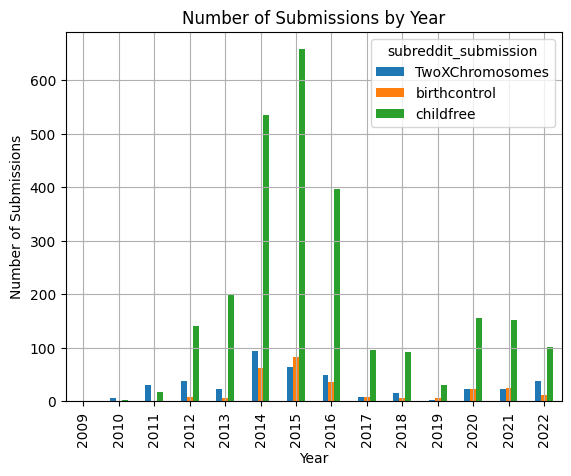

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming subsetCFBC_data is already defined and has a 'submission_time' column
# Convert 'submission_time' to datetime if it's not already
subsetCFBC_data['created_utc_submission'] = pd.to_datetime(subsetCFBC_data['created_utc_submission'])

# Extract the year from 'submission_time'
subsetCFBC_data['year'] = subsetCFBC_data['created_utc_submission'].dt.year

# Group by year and count the number of submissions
submission_counts_by_year = subsetCFBC_data.groupby(['year', 'subreddit_submission'])['id_submission'].nunique().unstack()

# Plot the results
plt.figure(figsize=(10, 6))
submission_counts_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Submissions')
plt.title('Number of Submissions by Year')
plt.grid(True)
plt.show()

In [46]:
print(subsetCFBC_data.columns)

Index(['id_submission', 'name', 'created_utc_submission', 'title', 'selftext',
       'subreddit_submission', 'author_submission', 'id_comment',
       'subreddit_comment', 'created_utc_comment', 'body', 'link_id',
       'parent_id', 'author_comment', 'year'],
      dtype='object')


How to handle NAs?

In [47]:
# average length of comment body
# Calculate average length of comment body
all_files['body_length'] = all_files['body'].str.len()
average_length = all_files['body_length'].mean()
print(f"Average comment length: {average_length:.2f} characters")

# If you want to see the distribution
print("\nComment length statistics:")
print(all_files['body_length'].describe())

Average comment length: 376.77 characters

Comment length statistics:
count    164448.000000
mean        376.766899
std         578.256905
min           1.000000
25%          98.000000
50%         219.000000
75%         444.000000
max       10066.000000
Name: body_length, dtype: float64


<Figure size 1000x600 with 0 Axes>

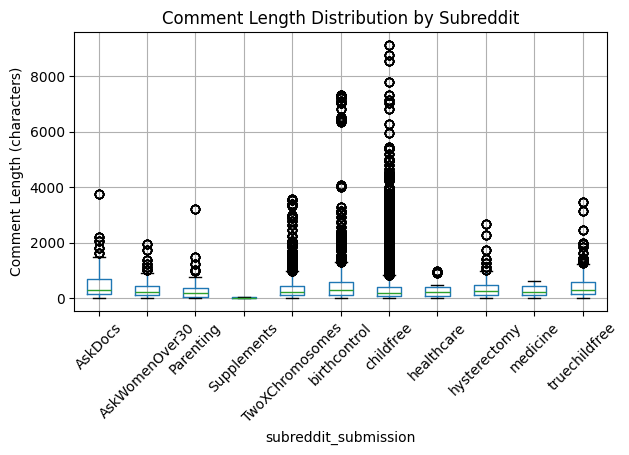

In [48]:
# Calculate comment length statistics by subreddit
subreddit_stats = all_files.groupby('subreddit_submission').agg({
    'body_length': ['count', 'mean', 'std', 'min', 'max']
}).round(2)

# a visual comparison
plt.figure(figsize=(10, 6))
all_files.boxplot(column='body_length', by='subreddit_submission', rot=45)
plt.title('Comment Length Distribution by Subreddit')
plt.ylabel('Comment Length (characters)')
plt.suptitle('')  # removes the automatic suptitle
plt.tight_layout()
plt.show()

total number of subreddits?

unique number of users?

only start with original post (submissions)? what is the most efficient way to get this subset?

#Filter out submissions that don't contain the word Essure (title or subtext) (from the allfiles df)
essure_pattern = r'\bEssure\b|\bessure\b'

In [49]:
# only read this in for de-bug purposes
# all_files = pd.read_csv('/Users/junheyang/Desktop/working_docs/Accelerator/data/Output/Reddit/truechildfree_essure_discussions.csv')

In [50]:
#Filter out submissions that don't contain the word Essure (title or subtext) (from the allfiles df)
essure_pattern = r'\bEssure\b|\bessure\b'
essure_submissions = all_files[
        all_files['title'].str.contains(essure_pattern, regex=True, case=True, na=False) |
        all_files['selftext'].str.contains(essure_pattern, regex=True, case=True, na=False)]
essure_submissions.head(10)

id_submission      name created_utc_submission  \
0         a321r       NaN    2009-11-11 00:44:34   
1         beu6w       NaN    2010-03-18 04:39:55   
2         chhhi       NaN    2010-06-21 21:33:37   
3         cjo99       NaN    2010-06-28 01:25:43   
4         cknwk       NaN    2010-06-30 19:47:49   
5         clroh       NaN    2010-07-04 01:58:21   
6         d4g5a       NaN    2010-08-23 15:33:55   
7         efv0c       NaN    2010-12-03 22:51:15   
8         g3ca7  t3_g3ca7    2011-03-13 23:15:38   
9         g3ca7  t3_g3ca7    2011-03-13 23:15:38   

                                               title  \
0  Essure - did you know about this form of perma...   
1  Anyone have experience with Essure? I'm consid...   
2  Is there an age minimum for Essure/tubal litig...   
3  Any experiences with transcervical sterilizati...   
4                         A good gynecologist story!   
5  Did anyone of you guys had sterilization couns...   
6  My Essure (permanent sterilization) Experience...   
7  Follow-up on "My Essure Experience" - HSG exam...   
8  Is it just me, or is this commerical for Essur...   
9  Is it just me, or is this commerical for Essur...   

                                            selftext subreddit_submission  \
0                                          [deleted]      TwoXChromosomes   
1                                                NaN      TwoXChromosomes   
2  Some background: I'm 17, live with my somewhat...      TwoXChromosomes   
3  I'm firmly decided to never have children and ...      TwoXChromosomes   
4  Ok, so, I turn 25 next month. Me and my husban...      TwoXChromosomes   
5  I had an appointment with Planned Parenthood t...      TwoXChromosomes   
6  I'm 27 and live in Southern California. \n\nIf...      TwoXChromosomes   
7  [My original post: "My Essure Experience from ...      TwoXChromosomes   
8                                                NaN      TwoXChromosomes   
9                                                NaN      TwoXChromosomes   

  author_submission id_comment subreddit_comment created_utc_comment  \
0         [deleted]        NaN               NaN                 NaT   
1            _Kita_        NaN               NaN                 NaT   
2         drugsrbad        NaN               NaN                 NaT   
3          Deviant1        NaN               NaN                 NaT   
4        Bantam_Fox        NaN               NaN                 NaT   
5     valentinedoux        NaN               NaN                 NaT   
6     valentinedoux        NaN               NaN                 NaT   
7     valentinedoux        NaN               NaN                 NaT   
8           caecias    c1kmai8   TwoXChromosomes 2011-03-13 23:28:29   
9           caecias    c1kmmrw   TwoXChromosomes 2011-03-14 00:54:17   

                                                body   link_id   parent_id  \
0                                                NaN       NaN         NaN   
1                                                NaN       NaN         NaN   
2                                                NaN       NaN         NaN   
3                                                NaN       NaN         NaN   
4                                                NaN       NaN         NaN   
5                                                NaN       NaN         NaN   
6                                                NaN       NaN         NaN   
7                                                NaN       NaN         NaN   
8  "Funny Video"? It's reinforcing so much patria...  t3_g3ca7    t3_g3ca7   
9  Although I agree with you on the whole, I don'...  t3_g3ca7  t1_c1kmai8   

  author_comment  body_length  
0            NaN          NaN  
1            NaN          NaN  
2            NaN          NaN  
3            NaN          NaN  
4            NaN          NaN  
5            NaN          NaN  
6            NaN          NaN  
7            NaN          NaN  
8         miohio        

In [51]:
# Drop duplicates based on title and keep only relevant columns
essure_submissions = essure_submissions.drop_duplicates(subset=['title'])[['title', 'selftext', 'subreddit_submission', 'created_utc_submission']]

In [52]:
essure_submissions.head(10)

title  \
0   Essure - did you know about this form of perma...   
1   Anyone have experience with Essure? I'm consid...   
2   Is there an age minimum for Essure/tubal litig...   
3   Any experiences with transcervical sterilizati...   
4                          A good gynecologist story!   
5   Did anyone of you guys had sterilization couns...   
6   My Essure (permanent sterilization) Experience...   
7   Follow-up on "My Essure Experience" - HSG exam...   
8   Is it just me, or is this commerical for Essur...   
27  Have any 2xers had Essure placed as birth cont...   

                                             selftext subreddit_submission  \
0                                           [deleted]      TwoXChromosomes   
1                                                 NaN      TwoXChromosomes   
2   Some background: I'm 17, live with my somewhat...      TwoXChromosomes   
3   I'm firmly decided to never have children and ...      TwoXChromosomes   
4   Ok, so, I turn 25 next month. Me and my husban...      TwoXChromosomes   
5   I had an appointment with Planned Parenthood t...      TwoXChromosomes   
6   I'm 27 and live in Southern California. \n\nIf...      TwoXChromosomes   
7   [My original post: "My Essure Experience from ...      TwoXChromosomes   
8                                                 NaN      TwoXChromosomes   
27  I think it's still fairly rare in the US so I'...      TwoXChromosomes   

   created_utc_submission  
0     2009-11-11 00:44:34  
1     2010-03-18 04:39:55  
2     2010-06-21 21:33:37  
3     2010-06-28 01:25:43  
4     2010-06-30 19:47:49  
5     2010-07-04 01:58:21  
6     2010-08-23 15:33:55  
7     2010-12-03 22:51:15  
8     2011-03-13 23:15:38  
27    2011-03-18 17:14:50

In [53]:
import nltk

In [54]:
#Download the necessary resources
# only needs to run once
nltk.download('punkt') # tokenizer
nltk.download('punkt_tab') 
nltk.download('stopwords') # stopwords
nltk.download('wordnet') # lemmatizer


[nltk_data] Downloading package punkt to /Users/arama1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/arama1/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arama1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/arama1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [55]:

# Import additional libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

text data preprocessing

In [56]:
custom_stopwords = pd.read_csv('../Stopwords.txt', header=None, names=['words'])['words'].tolist()

In [57]:
print("Custom Stopwords:")
print(custom_stopwords)

Custom Stopwords:
['Essure', 'essure', nan, 'Nan', 'http', 'would', 'quite', 'make', 'get', 'go', 'could', 'getting', 'deleted']


In [58]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):  # Check if text is not a string
        text = str(text)  # Convert it to string
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove punctuation and non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    #Remove custom stopwords
    tokens = [word for word in tokens if word not in custom_stopwords]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Rejoin tokens into a single string
    processed_text = ' '.join(tokens)
    return processed_text

In [59]:
#Apply preprocessing to the 'title' and 'selftext' columns -- do we also need to include title here?  For some reason this is generating processed_selftext and Proccessed_selftext
essure_submissions['Processed_selftext'] = essure_submissions['selftext'].apply(preprocess_text)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1036900a0>>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Accelerator/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [60]:
essure_submissions.head(10)

title  \
0   Essure - did you know about this form of perma...   
1   Anyone have experience with Essure? I'm consid...   
2   Is there an age minimum for Essure/tubal litig...   
3   Any experiences with transcervical sterilizati...   
4                          A good gynecologist story!   
5   Did anyone of you guys had sterilization couns...   
6   My Essure (permanent sterilization) Experience...   
7   Follow-up on "My Essure Experience" - HSG exam...   
8   Is it just me, or is this commerical for Essur...   
27  Have any 2xers had Essure placed as birth cont...   

                                             selftext subreddit_submission  \
0                                           [deleted]      TwoXChromosomes   
1                                                 NaN      TwoXChromosomes   
2   Some background: I'm 17, live with my somewhat...      TwoXChromosomes   
3   I'm firmly decided to never have children and ...      TwoXChromosomes   
4   Ok, so, I turn 25 next month. Me and my husban...      TwoXChromosomes   
5   I had an appointment with Planned Parenthood t...      TwoXChromosomes   
6   I'm 27 and live in Southern California. \n\nIf...      TwoXChromosomes   
7   [My original post: "My Essure Experience from ...      TwoXChromosomes   
8                                                 NaN      TwoXChromosomes   
27  I think it's still fairly rare in the US so I'...      TwoXChromosomes   

   created_utc_submission                                 Processed_selftext  
0     2009-11-11 00:44:34                                                     
1     2010-03-18 04:39:55                                                nan  
2     2010-06-21 21:33:37  background live somewhat progressive parent st...  
3     2010-06-28 01:25:43  firmly decided never child came across option ...  
4     2010-06-30 19:47:49  ok turn next month husband sure ever want kid ...  
5     2010-07-04 01:58:21  appointment planned parenthood morning pap sme...  
6     2010-08-23 15:33:55  live southern california know watch youtube ju...  
7     2010-12-03 22:51:15  original post experience consultation procedur...  
8     2011-03-13 23:15:38                                                nan  
27    2011-03-18 17:14:50       think still fairly rare u guessing love hear

In [14]:
essure_submissions['Processed_title'] = essure_submissions['title'].apply(preprocess_text)

In [61]:
essure_submissions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 140391
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   title                   1359 non-null   object        
 1   selftext                1261 non-null   object        
 2   subreddit_submission    1359 non-null   object        
 3   created_utc_submission  1359 non-null   datetime64[ns]
 4   Processed_selftext      1359 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 63.7+ KB


In [62]:

essure_submissions = essure_submissions.dropna(subset=['Processed_selftext'])

In [63]:
essure_submissions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 140391
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   title                   1359 non-null   object        
 1   selftext                1261 non-null   object        
 2   subreddit_submission    1359 non-null   object        
 3   created_utc_submission  1359 non-null   datetime64[ns]
 4   Processed_selftext      1359 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 63.7+ KB


In [64]:
essure_submissions.head(10)

title  \
0   Essure - did you know about this form of perma...   
1   Anyone have experience with Essure? I'm consid...   
2   Is there an age minimum for Essure/tubal litig...   
3   Any experiences with transcervical sterilizati...   
4                          A good gynecologist story!   
5   Did anyone of you guys had sterilization couns...   
6   My Essure (permanent sterilization) Experience...   
7   Follow-up on "My Essure Experience" - HSG exam...   
8   Is it just me, or is this commerical for Essur...   
27  Have any 2xers had Essure placed as birth cont...   

                                             selftext subreddit_submission  \
0                                           [deleted]      TwoXChromosomes   
1                                                 NaN      TwoXChromosomes   
2   Some background: I'm 17, live with my somewhat...      TwoXChromosomes   
3   I'm firmly decided to never have children and ...      TwoXChromosomes   
4   Ok, so, I turn 25 next month. Me and my husban...      TwoXChromosomes   
5   I had an appointment with Planned Parenthood t...      TwoXChromosomes   
6   I'm 27 and live in Southern California. \n\nIf...      TwoXChromosomes   
7   [My original post: "My Essure Experience from ...      TwoXChromosomes   
8                                                 NaN      TwoXChromosomes   
27  I think it's still fairly rare in the US so I'...      TwoXChromosomes   

   created_utc_submission                                 Processed_selftext  
0     2009-11-11 00:44:34                                                     
1     2010-03-18 04:39:55                                                nan  
2     2010-06-21 21:33:37  background live somewhat progressive parent st...  
3     2010-06-28 01:25:43  firmly decided never child came across option ...  
4     2010-06-30 19:47:49  ok turn next month husband sure ever want kid ...  
5     2010-07-04 01:58:21  appointment planned parenthood morning pap sme...  
6     2010-08-23 15:33:55  live southern california know watch youtube ju...  
7     2010-12-03 22:51:15  original post experience consultation procedur...  
8     2011-03-13 23:15:38                                                nan  
27    2011-03-18 17:14:50       think still fairly rare u guessing love hear

In [16]:
essure_submissions['title_selftext'] = essure_submissions['title'] + ' ' + essure_submissions['selftext']
essure_submissions['Processed_title_selftext'] = essure_submissions['title_selftext'].apply(preprocess_text)

In [21]:
pd.set_option('display.max_colwidth', None)
print(essure_submissions['Processed_title_selftext'])


0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [193]:
print("Column names in essure_submissions:")
print(essure_submissions.columns)

Column names in essure_submissions:
Index(['title', 'selftext', 'subreddit_submission', 'created_utc_submission',
       'Proccessed_selftext', 'Processed_selftext', 'year'],
      dtype='object')


text data representation: consider word frequency, TFIDF, embeddings

In [148]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [194]:
vectorizer = CountVectorizer()
x_bow = vectorizer.fit_transform(essure_submissions['Processed_selftext'])

print("Feature Names")
print(vectorizer.get_feature_names_out())

print("\nBag of Words Matrix")
print(x_bow.toarray())

Feature Names
['aa' 'aaa' 'aaaaand' ... 'zonked' 'zoom' 'zthea']

Bag of Words Matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [195]:
feature_names = vectorizer.get_feature_names_out()

# Convert sparse matrix to dense array
bow_array = x_bow.toarray()

# Create a DataFrame
bow_df = pd.DataFrame(bow_array, columns=feature_names)

# Display the first few rows and columns
print("\nBag-of-Words Representation (first 5 documents, first 10 features):")
print(bow_df.iloc[:5, :10])

# If you want to see all features for a specific document:
doc_index = 0
print(f"\nAll features for document {doc_index}:")
print(bow_df.iloc[doc_index].loc[bow_df.iloc[doc_index] != 0].sort_values(ascending=False))


Bag-of-Words Representation (first 5 documents, first 10 features):
   aa  aaa  aaaaand  aaaall  ab  aback  abandoned  abated  abdomen  abdominal
0   0    0        0       0   0      0          0       0        0          0
1   0    0        0       0   0      0          0       0        0          0
2   0    0        0       0   0      0          0       0        0          0
3   0    0        0       0   0      0          0       0        0          0
4   0    0        0       0   0      0          0       0        0          0

All features for document 0:
Series([], Name: 0, dtype: int64)


In [196]:
word_freq = bow_df.sum().sort_values(ascending=False)
print("\nTop 100 Most Frequent Words:")

pd.set_option('display.max_rows', None)

print(word_freq.head(100))


Top 100 Most Frequent Words:
want             1457
doctor           1435
like             1123
procedure        1089
year              973
one               948
know              907
time              865
kid               843
child             802
said              701
even              695
really            676
got               674
also              672
day               660
told              623
done              611
tubal             593
woman             588
pain              583
never             574
going             574
iud               562
birth             553
control           548
surgery           545
feel              535
month             535
went              530
back              511
wanted            500
thing             497
sure              490
since             475
think             472
still             469
much              467
sterilization     465
first             463
take              459
period            455
people            445
option            444
ap

In [197]:
tfidf_vectorizer = TfidfVectorizer()
x_tfidf = tfidf_vectorizer.fit_transform(essure_submissions['Processed_selftext']) 

print("Feature Names")
print(tfidf_vectorizer.get_feature_names_out())

print("\nTF-IDF Matrix")
print(x_tfidf.toarray())

Feature Names
['aa' 'aaa' 'aaaaand' ... 'zonked' 'zoom' 'zthea']

TF-IDF Matrix
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [198]:
essure_submissions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 7
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   title                   1359 non-null   object        
 1   selftext                1261 non-null   object        
 2   subreddit_submission    1359 non-null   object        
 3   created_utc_submission  1359 non-null   datetime64[ns]
 4   Proccessed_selftext     1359 non-null   object        
 5   Processed_selftext      1359 non-null   object        
 6   year                    1359 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 79.6+ KB


In [201]:
essure_submissions['created_utc_submission'] = pd.to_datetime(essure_submissions['created_utc_submission'])

# Extract the year from 'created_utc_submission'
essure_submissions['year'] = essure_submissions['created_utc_submission'].dt.year

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Dictionary to store TF-IDF vectors by year
tfidf_vectors_by_year = {}

# Group by year and apply the TF-IDF vectorizer to each group
for year, group in essure_submissions.groupby('year'):
    #Filter out empty or stop-word only documents
    non_empty_group = group[group['Processed_selftext'].str.strip().astype(bool)]
    if not non_empty_group.empty:
        x_tfidf = tfidf_vectorizer.fit_transform(non_empty_group['Processed_selftext'])
        tfidf_vectors_by_year[year] = x_tfidf

        print(f"\nYear: {year}")
        print("Feature Names")
        print(tfidf_vectorizer.get_feature_names_out())


with open('tfidf_vectors_by_year.txt', 'w') as file:
    # Group by year and apply the TF-IDF vectorizer to each group
    for year, group in essure_submissions.groupby('year'):
        # Filter out empty or stop-word only documents
        non_empty_group = group[group['Processed_selftext'].str.strip().astype(bool)]
        if not non_empty_group.empty:
            x_tfidf = tfidf_vectorizer.fit_transform(non_empty_group['Processed_selftext'])
            tfidf_vectors_by_year[year] = x_tfidf

            file.write(f"\nYear: {year}\n")
            file.write("Feature Names:\n")
            file.write(", ".join(tfidf_vectorizer.get_feature_names_out()) + "\n")
      



Year: 2010
Feature Names
['able' 'absolutely' 'accident' 'across' 'actually' 'afternoon' 'age'
 'allergic' 'almost' 'already' 'also' 'always' 'anesthesia' 'anesthetic'
 'anesthetist' 'angle' 'ankle' 'annoyed' 'another' 'answered' 'anyone'
 'anything' 'anyway' 'apologized' 'appalled' 'applied' 'appointment'
 'approved' 'arby' 'area' 'argh' 'around' 'arrived' 'arrogant' 'ask'
 'asked' 'asking' 'asks' 'asleep' 'assistant' 'associated' 'assume'
 'assured' 'ate' 'attempted' 'august' 'austin' 'awake' 'away' 'awhile'
 'awkward' 'baby' 'back' 'background' 'bag' 'barbie' 'basically' 'bat'
 'bath' 'beat' 'bed' 'bedridden' 'benefit' 'besides' 'best' 'big' 'birth'
 'bit' 'blanket' 'bleeding' 'bloated' 'blocked' 'blood' 'blue' 'blurry'
 'body' 'booked' 'bottle' 'bottom' 'box' 'boyfriend' 'breath' 'bring'
 'brought' 'building' 'bullshit' 'bunch' 'ca' 'cabbage' 'california'
 'called' 'came' 'cannula' 'car' 'card' 'catheter' 'cervix' 'chance'
 'change' 'changed' 'chart' 'checked' 'child' 'choice' 'ch

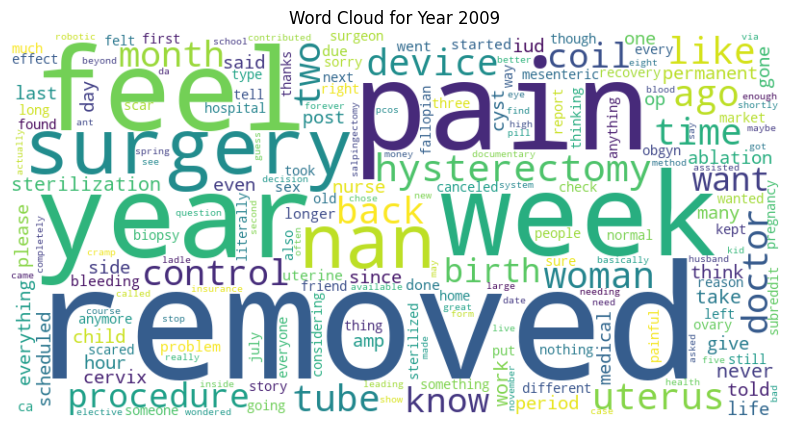

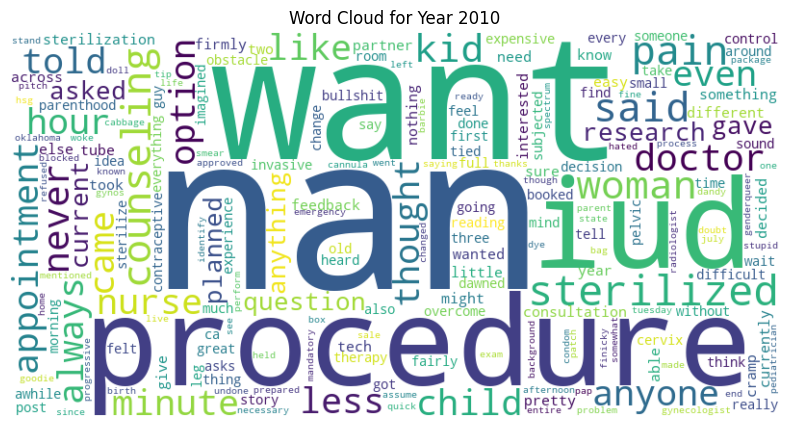

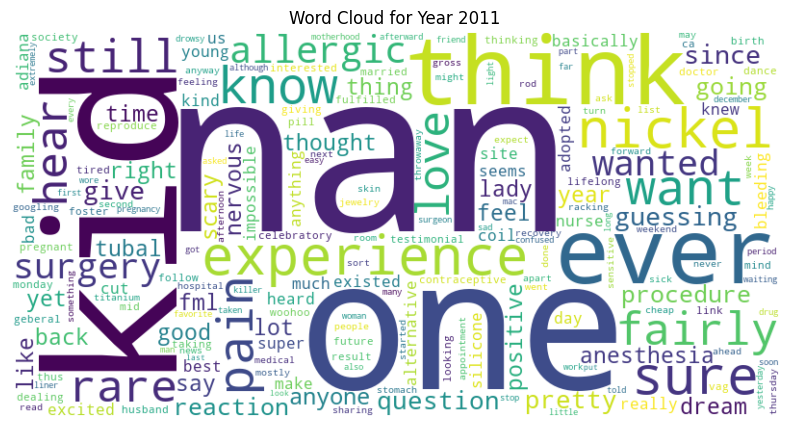

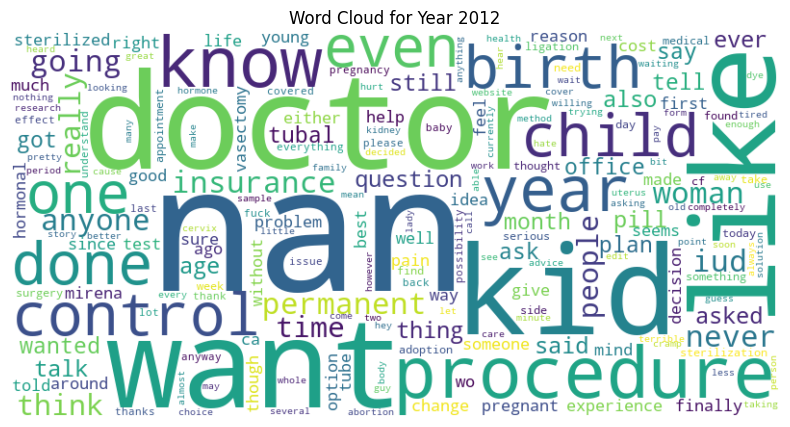

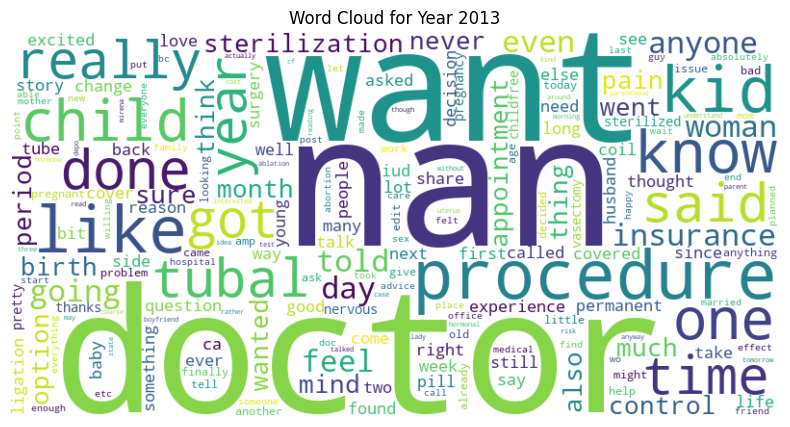

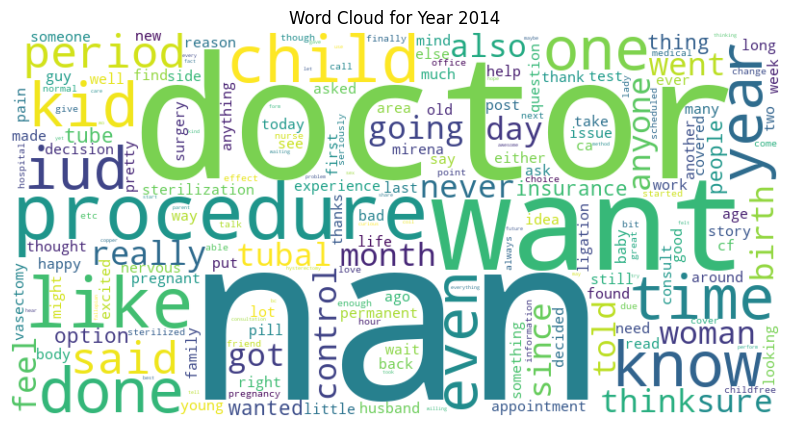

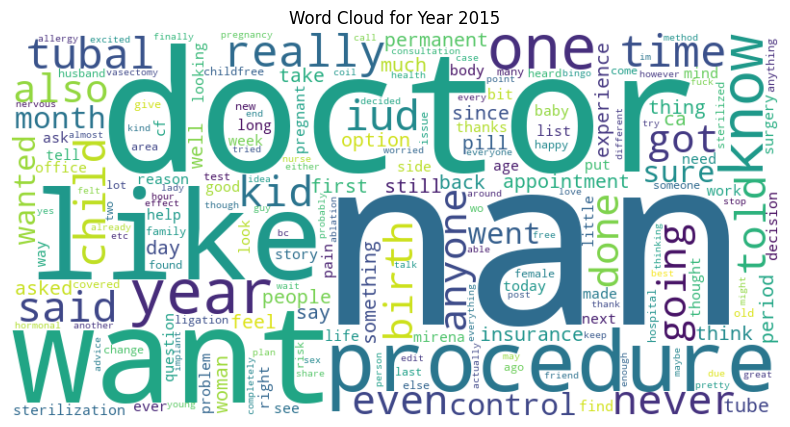

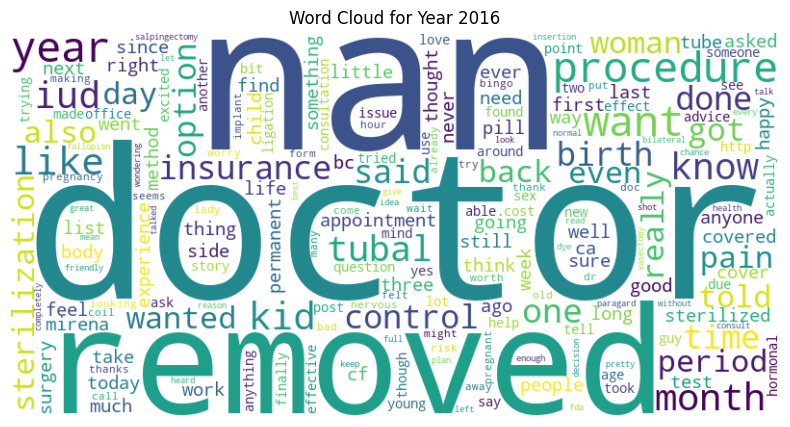

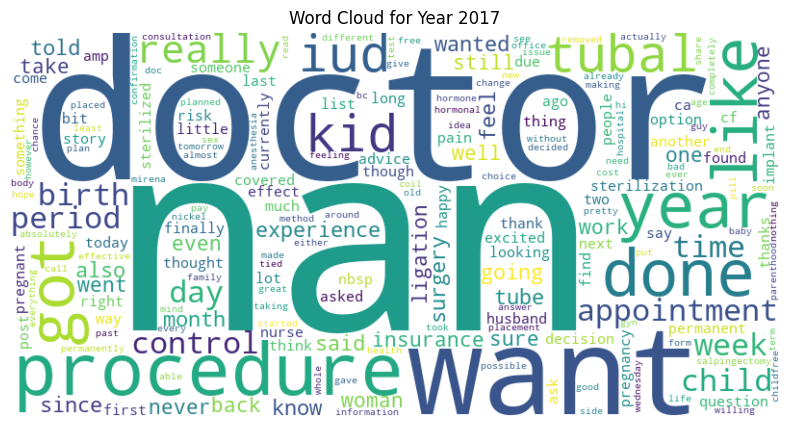

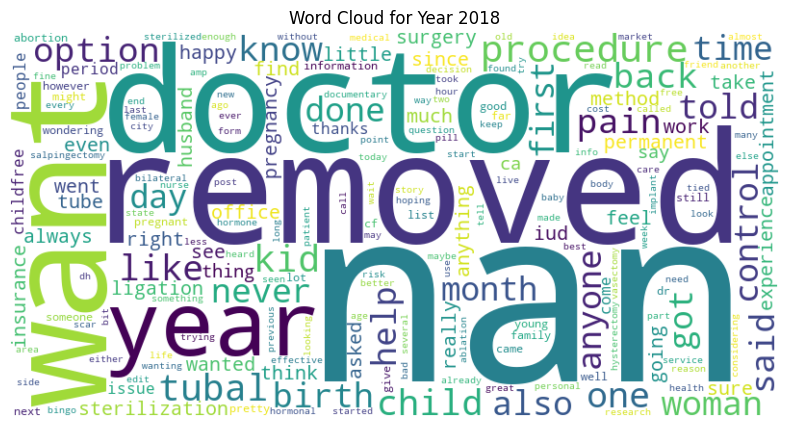

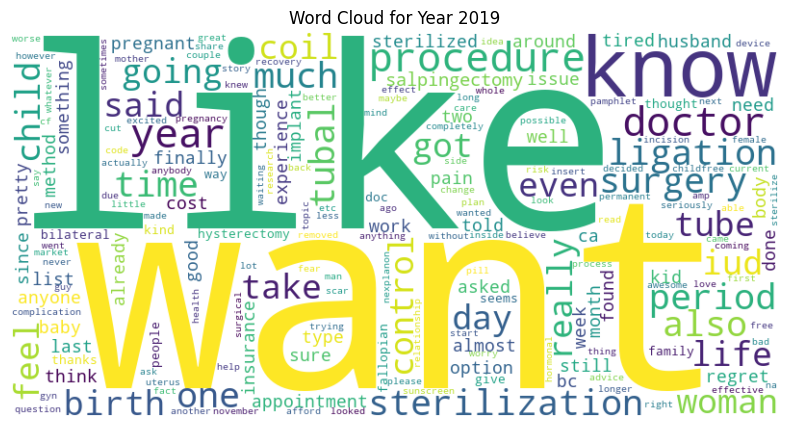

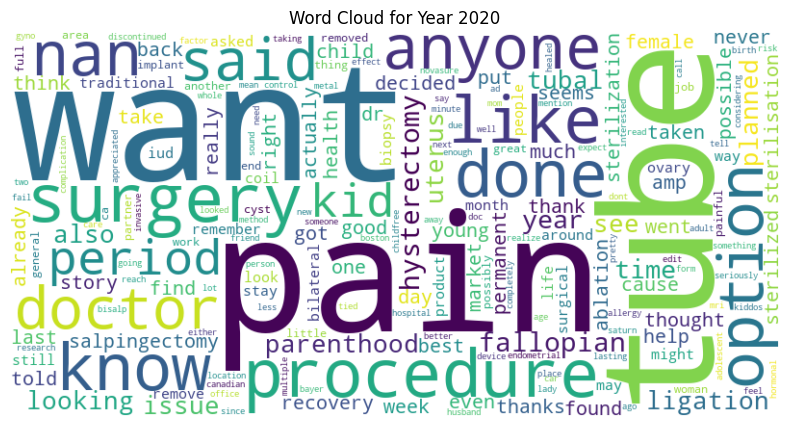

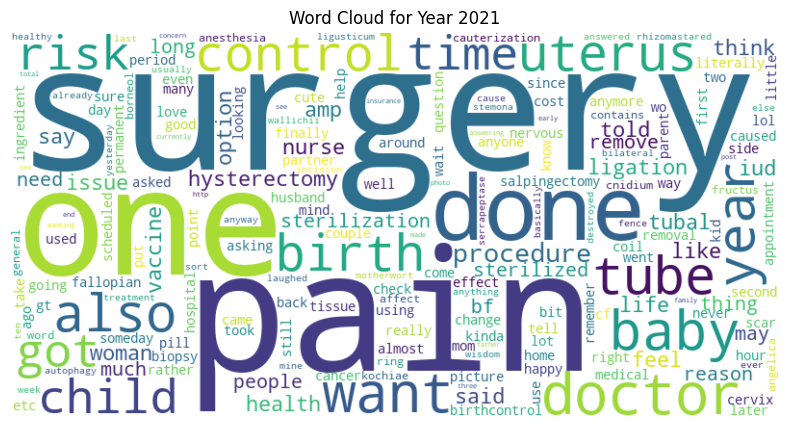

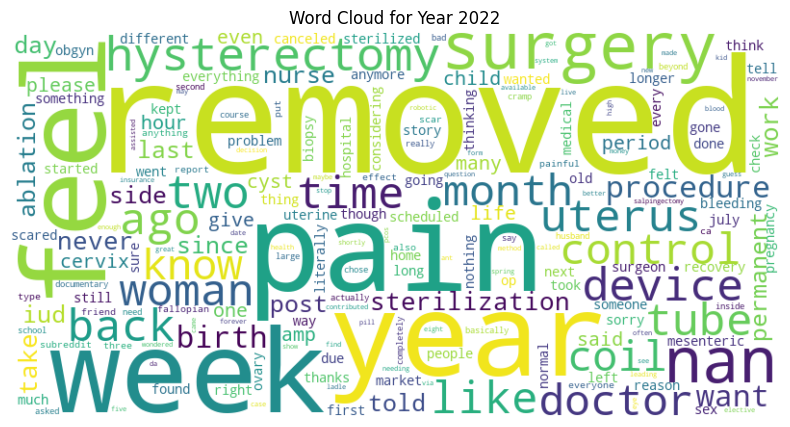

In [203]:
with open('tfidf_vectors_by_year.txt', 'w') as file:
    # Group by year and apply the TF-IDF vectorizer to each group
    for year, group in essure_submissions.groupby('year'):
        non_empty_group = group[group['Processed_selftext'].str.strip().astype(bool)]
        if not non_empty_group.empty:
            x_tfidf = tfidf_vectorizer.fit_transform(non_empty_group['Processed_selftext'])
            tfidf_vectors_by_year[year] = x_tfidf

            file.write(f"\nYear: {year}\n")
            file.write("Feature Names:\n")
            file.write(", ".join(tfidf_vectorizer.get_feature_names_out()) + "\n")

        # Generate word cloud for the year
        feature_names = tfidf_vectorizer.get_feature_names_out()
        tfidf_scores = x_tfidf.sum(axis=0).A1
        word_freq = dict(zip(feature_names, tfidf_scores))
        
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        
        # Display the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Year {year}')
        plt.axis('off')
        plt.show()

In [207]:
# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert sparse matrix to dense array
tfidf_array = x_tfidf.toarray()

# Create a DataFrame
tfidf_df = pd.DataFrame(tfidf_array, columns=feature_names)

# Calculate the mean TF-IDF score for each word across all documents
mean_tfidf = tfidf_df.mean()

# Sort words by their mean TF-IDF score in descending order
top_words = mean_tfidf.sort_values(ascending=False)

pd.set_option('display.max_rows', None)

print("\nTop 100 Words by Mean TF-IDF Score:")
print(top_words.head(100))


Top 100 Words by Mean TF-IDF Score:
removed          0.094900
pain             0.053220
year             0.047677
week             0.045862
feel             0.044267
surgery          0.041553
nan              0.038462
hysterectomy     0.035769
two              0.034599
device           0.032766
uterus           0.031948
ago              0.031505
woman            0.031195
time             0.030642
back             0.030248
tube             0.030147
like             0.029641
control          0.028621
doctor           0.028027
month            0.027449
coil             0.026683
know             0.026500
procedure        0.026397
want             0.025450
birth            0.025395
sterilization    0.025117
take             0.024674
never            0.024420
work             0.024088
iud              0.022357
day              0.022351
ablation         0.021995
permanent        0.021702
side             0.021666
since            0.021577
told             0.021567
last             0.021521
p

In [205]:
# Normalize word frequencies
word_freq_normalized = word_freq / word_freq.sum()

# Calculate the rank difference between TF-IDF and frequency
rank_diff = pd.DataFrame({
    'tfidf_rank': top_words.rank(ascending=False),
    'freq_rank': word_freq_normalized.rank(ascending=False)
})
rank_diff['rank_difference'] = rank_diff['freq_rank'] - rank_diff['tfidf_rank']

# Sort by rank difference to find words with high TF-IDF rank but low frequency rank
interesting_words = rank_diff.sort_values('rank_difference', ascending=False)

pd.set_option('display.max_rows', None)

print("Top 50 words with high TF-IDF score but low frequency:")
print(interesting_words.head(50))

AttributeError: 'dict' object has no attribute 'sum'

In [36]:
from wordcloud import WordCloud

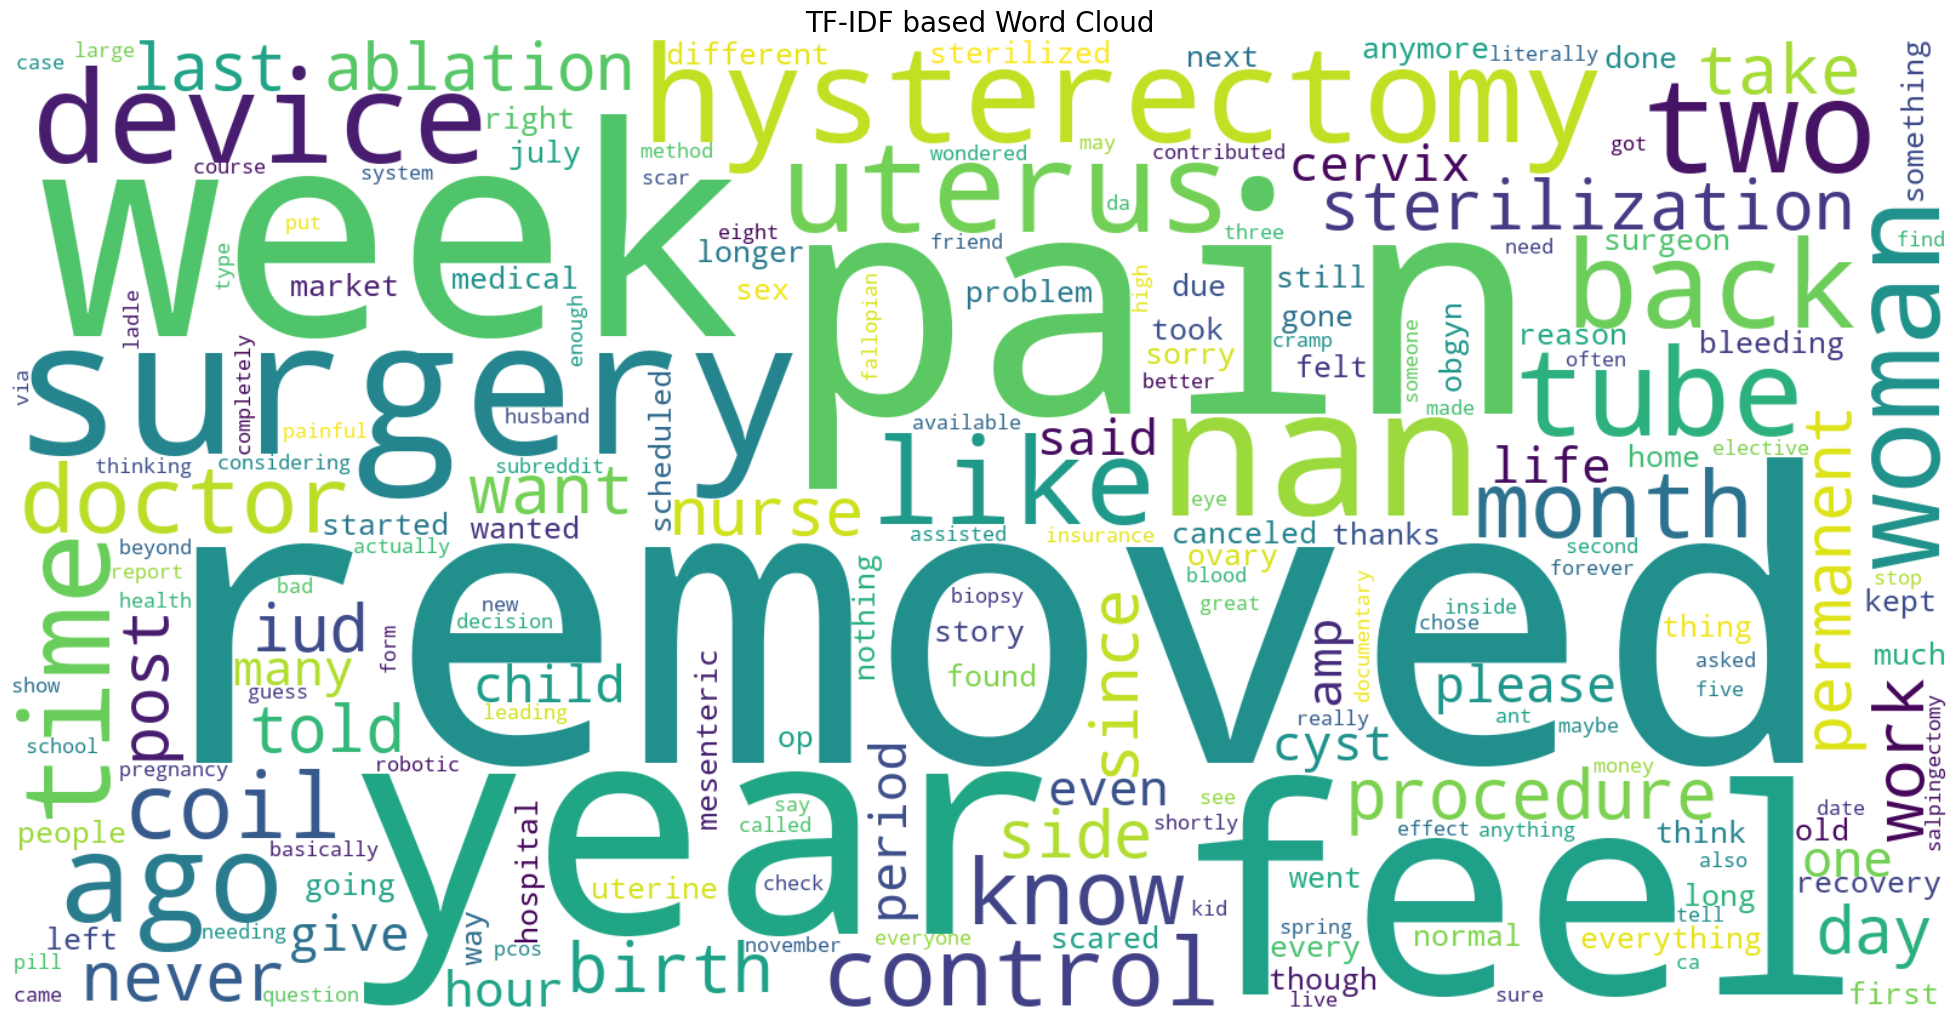

In [206]:
tfidf_dict = top_words.to_dict()
tfidf_wordcloud = WordCloud(width=1600, height=800, background_color='white').generate_from_frequencies(tfidf_dict)

plt.figure(figsize=(20, 10))
plt.imshow(tfidf_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('TF-IDF based Word Cloud', fontsize=20)
plt.tight_layout(pad=0)
plt.show()
